In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils_exp03 as u
from numpy.random import seed
seed(12138)

g:\music_similarity\.venv\lib\site-packages\resampy\filters.py:32: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
g:\music_similarity\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
MUSDB_ROOT = "./musdb18"
NUM_TEST_PAIRS = 500  # Increased from 100 to 500!
CLIP_DURATION = 10.0
CLIPS_PER_TRACK = 1

print(f"Configuration:")
print(f"  Test pairs: {NUM_TEST_PAIRS}")
print(f"  Total comparisons: {NUM_TEST_PAIRS * 2}")
print(f"  Clip duration: {CLIP_DURATION}s")

Configuration:
  Test pairs: 500
  Total comparisons: 1000
  Clip duration: 10.0s


In [3]:
# Load OpenL3
openl3_model, openl3_device = u.load_openl3_model(
    content_type='music',
    embedding_size=6144,
    input_repr='mel256',
    use_gpu=True
)

OpenL3 model loaded on GPU: NVIDIA GeForce RTX 5090


g:\music_similarity\.venv\lib\site-packages\torchopenl3\models.py:200: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = librosa.filters.mel(


In [4]:
# Load AudioMAE
audiomae_extractor, audiomae_model, audiomae_device = u.load_audiomae_model(use_gpu=True)

Using GPU: NVIDIA GeForce RTX 5090
AudioMAE model loaded on GPU: NVIDIA GeForce RTX 5090


In [5]:
# Process all pairs in streaming mode
openl3_features, audiomae_features = u.process_cross_mix_pairs_streaming(
    musdb_root=MUSDB_ROOT,
    subset='train',
    num_pairs=NUM_TEST_PAIRS,
    clip_duration=CLIP_DURATION,
    clips_per_track=CLIPS_PER_TRACK,
    openl3_model=openl3_model,
    openl3_device=openl3_device,
    audiomae_model=audiomae_model,
    audiomae_extractor=audiomae_extractor,
    audiomae_device=audiomae_device,
    seed=123
)

Total tracks available: 100
Processing 500 pairs...

Processing pair 1/500: Alexander Ross - Goodbye Bolero + Patrick Talbot - Set Me Free


Processing pair 2/500: The Scarlet Brand - Les Fleurs Du Mal + Leaf - Come Around


Processing pair 3/500: James May - On The Line + Atlantis Bound - It Was My Fault For Waiting


Processing pair 4/500: Johnny Lokke - Promises & Lies + Actions - South Of The Water


Processing pair 5/500: Leaf - Wicked + North To Alaska - All The Same


Processing pair 6/500: Sweet Lights - You Let Me Down + Music Delta - Gospel


Processing pair 7/500: Actions - Devil's Words + Fergessen - The Wind


Processing pair 8/500: Cnoc An Tursa - Bannockburn + Hop Along - Sister Cities


Processing pair 9/500: Angela Thomas Wade - Milk Cow Blues + Matthew Entwistle - Dont You Ever


Processing pair 10/500: Music Delta - Gospel + Secret Mountains - High Horse


Processing pair 11/500: Lushlife - Toynbee Suite + Remember December - C U Next Time


Processing pair 12/500: Creepoid - OldTree + James May - All Souls Moon


Processing pair 13/500: Phre The Eon - Everybody's Falling Apart + Leaf - Come Around


Processing pair 14/500: Music Delta - Country1 + Flags - 54


Processing pair 15/500: Fergessen - Back From The Start + Music Delta - Hendrix


Processing pair 16/500: Leaf - Summerghost + James May - On The Line


Processing pair 17/500: Giselle - Moss + Auctioneer - Our Future Faces


Processing pair 18/500: James May - If You Say + Alexander Ross - Velvet Curtain


Processing pair 19/500: Music Delta - Britpop + Young Griffo - Blood To Bone


Processing pair 20/500: Triviul - Dorothy + A Classic Education - NightOwl


Processing pair 21/500: ANiMAL - Easy Tiger + Auctioneer - Our Future Faces


Processing pair 22/500: The Wrong'Uns - Rothko + Hezekiah Jones - Borrowed Heart


Processing pair 23/500: BigTroubles - Phantom + Young Griffo - Blood To Bone


Processing pair 24/500: Young Griffo - Facade + Young Griffo - Pennies


Processing pair 25/500: Triviul - Dorothy + Leaf - Summerghost


Processing pair 26/500: Remember December - C U Next Time + Young Griffo - Pennies


Processing pair 27/500: Leaf - Come Around + Hop Along - Sister Cities


Processing pair 28/500: Music Delta - Gospel + Snowmine - Curfews


Processing pair 29/500: Secret Mountains - High Horse + ANiMAL - Clinic A


Processing pair 30/500: Wall Of Death - Femme + Voelund - Comfort Lives In Belief


Processing pair 31/500: Creepoid - OldTree + A Classic Education - NightOwl


Processing pair 32/500: ANiMAL - Clinic A + Voelund - Comfort Lives In Belief


Processing pair 33/500: Flags - 54 + Hop Along - Sister Cities


Processing pair 34/500: Actions - Devil's Words + Giselle - Moss


Processing pair 35/500: Patrick Talbot - Set Me Free + Flags - 54


Processing pair 36/500: Young Griffo - Pennies + Leaf - Wicked


Processing pair 37/500: Helado Negro - Mitad Del Mundo + Grants - PunchDrunk


Processing pair 38/500: AvaLuna - Waterduct + Tim Taler - Stalker


Processing pair 39/500: Alexander Ross - Velvet Curtain + ANiMAL - Clinic A


Processing pair 40/500: Fergessen - The Wind + Titanium - Haunted Age


Processing pair 41/500: Chris Durban - Celebrate + Leaf - Wicked


Processing pair 42/500: ANiMAL - Rockshow + Patrick Talbot - A Reason To Leave


Processing pair 43/500: The Scarlet Brand - Les Fleurs Du Mal + The Long Wait - Back Home To Blue


Processing pair 44/500: Celestial Shore - Die For Us + Steven Clark - Bounty


Processing pair 45/500: The Long Wait - Back Home To Blue + Triviul - Dorothy


Processing pair 46/500: Music Delta - Rockabilly + James May - On The Line


Processing pair 47/500: Faces On Film - Waiting For Ga + Music Delta - Gospel


Processing pair 48/500: Music Delta - Disco + Alexander Ross - Velvet Curtain


Processing pair 49/500: Music Delta - Rockabilly + Phre The Eon - Everybody's Falling Apart


Processing pair 50/500: Strand Of Oaks - Spacestation + Hezekiah Jones - Borrowed Heart


Processing pair 51/500: Music Delta - 80s Rock + Flags - 54


Processing pair 52/500: The Wrong'Uns - Rothko + Music Delta - Country1


Processing pair 53/500: BigTroubles - Phantom + Clara Berry And Wooldog - Waltz For My Victims


Processing pair 54/500: Hollow Ground - Left Blind + Voelund - Comfort Lives In Belief


Processing pair 55/500: James May - Dont Let Go + Tim Taler - Stalker


Processing pair 56/500: Music Delta - Country2 + Music Delta - Grunge


Processing pair 57/500: Traffic Experiment - Once More (With Feeling) + Music Delta - Reggae


Processing pair 58/500: The Wrong'Uns - Rothko + Actions - Devil's Words


Processing pair 59/500: St Vitus - Word Gets Around + Invisible Familiars - Disturbing Wildlife


Processing pair 60/500: Meaxic - Take A Step + Music Delta - Disco


Processing pair 61/500: Port St Willow - Stay Even + Titanium - Haunted Age


Processing pair 62/500: Traffic Experiment - Sirens + North To Alaska - All The Same


Processing pair 63/500: Triviul - Dorothy + Fergessen - Nos Palpitants


Processing pair 64/500: Meaxic - You Listen + Music Delta - Grunge


Processing pair 65/500: Grants - PunchDrunk + Voelund - Comfort Lives In Belief


Processing pair 66/500: James May - Dont Let Go + The Scarlet Brand - Les Fleurs Du Mal


Processing pair 67/500: Fergessen - The Wind + Sweet Lights - You Let Me Down


Processing pair 68/500: Matthew Entwistle - Dont You Ever + James May - On The Line


Processing pair 69/500: Young Griffo - Facade + Helado Negro - Mitad Del Mundo


Processing pair 70/500: Secret Mountains - High Horse + Hezekiah Jones - Borrowed Heart


Processing pair 71/500: Clara Berry And Wooldog - Waltz For My Victims + Leaf - Wicked


Processing pair 72/500: James May - On The Line + Johnny Lokke - Whisper To A Scream


Processing pair 73/500: The Scarlet Brand - Les Fleurs Du Mal + North To Alaska - All The Same


Processing pair 74/500: Night Panther - Fire + Phre The Eon - Everybody's Falling Apart


Processing pair 75/500: Leaf - Wicked + Patrick Talbot - Set Me Free


Processing pair 76/500: Music Delta - Gospel + Fergessen - Nos Palpitants


Processing pair 77/500: Music Delta - Reggae + Actions - Devil's Words


Processing pair 78/500: Hop Along - Sister Cities + Triviul - Dorothy


Processing pair 79/500: James May - Dont Let Go + Music Delta - Gospel


Processing pair 80/500: Music Delta - Disco + Alexander Ross - Velvet Curtain


Processing pair 81/500: The Districts - Vermont + Chris Durban - Celebrate


Processing pair 82/500: Voelund - Comfort Lives In Belief + Angela Thomas Wade - Milk Cow Blues


Processing pair 83/500: Johnny Lokke - Promises & Lies + Actions - One Minute Smile


Processing pair 84/500: Hop Along - Sister Cities + AvaLuna - Waterduct


Processing pair 85/500: Actions - One Minute Smile + Strand Of Oaks - Spacestation


Processing pair 86/500: The Scarlet Brand - Les Fleurs Du Mal + Flags - 54


Processing pair 87/500: Music Delta - Rock + James May - If You Say


Processing pair 88/500: Music Delta - 80s Rock + Music Delta - Punk


Processing pair 89/500: North To Alaska - All The Same + Remember December - C U Next Time


Processing pair 90/500: Wall Of Death - Femme + BigTroubles - Phantom


Processing pair 91/500: Music Delta - Country1 + BigTroubles - Phantom


Processing pair 92/500: Remember December - C U Next Time + Flags - 54


Processing pair 93/500: Music Delta - Grunge + Music Delta - Reggae


Processing pair 94/500: James May - On The Line + Titanium - Haunted Age


Processing pair 95/500: Skelpolu - Together Alone + Remember December - C U Next Time


Processing pair 96/500: Music Delta - 80s Rock + Jokers, Jacks & Kings - Sea Of Leaves


Processing pair 97/500: Fergessen - Nos Palpitants + Music Delta - Punk


Processing pair 98/500: Fergessen - Nos Palpitants + Music Delta - Rock


Processing pair 99/500: Young Griffo - Facade + Chris Durban - Celebrate


Processing pair 100/500: Leaf - Summerghost + Music Delta - Grunge


Processing pair 101/500: Atlantis Bound - It Was My Fault For Waiting + Music Delta - Country2


Processing pair 102/500: The Scarlet Brand - Les Fleurs Du Mal + Fergessen - The Wind


Processing pair 103/500: Grants - PunchDrunk + Auctioneer - Our Future Faces


Processing pair 104/500: A Classic Education - NightOwl + Music Delta - 80s Rock


Processing pair 105/500: Snowmine - Curfews + Actions - One Minute Smile


Processing pair 106/500: Skelpolu - Together Alone + Young Griffo - Facade


Processing pair 107/500: Remember December - C U Next Time + Leaf - Come Around


Processing pair 108/500: Titanium - Haunted Age + Grants - PunchDrunk


Processing pair 109/500: Wall Of Death - Femme + Fergessen - Nos Palpitants


Processing pair 110/500: Clara Berry And Wooldog - Air Traffic + Swinging Steaks - Lost My Way


Processing pair 111/500: Swinging Steaks - Lost My Way + Giselle - Moss


Processing pair 112/500: Faces On Film - Waiting For Ga + Tim Taler - Stalker


Processing pair 113/500: Music Delta - Rock + Angela Thomas Wade - Milk Cow Blues


Processing pair 114/500: Actions - One Minute Smile + Titanium - Haunted Age


Processing pair 115/500: AvaLuna - Waterduct + Music Delta - Reggae


Processing pair 116/500: Leaf - Come Around + Music Delta - Hendrix


Processing pair 117/500: Strand Of Oaks - Spacestation + Patrick Talbot - Set Me Free


Processing pair 118/500: Actions - Devil's Words + Young Griffo - Blood To Bone


Processing pair 119/500: Music Delta - Punk + Aimee Norwich - Child


Processing pair 120/500: The So So Glos - Emergency + Clara Berry And Wooldog - Air Traffic


Processing pair 121/500: Titanium - Haunted Age + Lushlife - Toynbee Suite


Processing pair 122/500: Music Delta - Punk + Traffic Experiment - Once More (With Feeling)


Processing pair 123/500: BigTroubles - Phantom + St Vitus - Word Gets Around


Processing pair 124/500: Traffic Experiment - Sirens + Faces On Film - Waiting For Ga


Processing pair 125/500: Lushlife - Toynbee Suite + Triviul - Angelsaint


Processing pair 126/500: Remember December - C U Next Time + The Scarlet Brand - Les Fleurs Du Mal


Processing pair 127/500: Meaxic - You Listen + Young Griffo - Blood To Bone


Processing pair 128/500: Creepoid - OldTree + Fergessen - The Wind


Processing pair 129/500: Clara Berry And Wooldog - Air Traffic + ANiMAL - Clinic A


Processing pair 130/500: The So So Glos - Emergency + Patrick Talbot - Set Me Free


Processing pair 131/500: Music Delta - Britpop + James May - On The Line


Processing pair 132/500: Atlantis Bound - It Was My Fault For Waiting + Spike Mullings - Mike's Sulking


Processing pair 133/500: Johnny Lokke - Whisper To A Scream + Remember December - C U Next Time


Processing pair 134/500: Strand Of Oaks - Spacestation + Music Delta - Punk


Processing pair 135/500: James May - All Souls Moon + Music Delta - 80s Rock


Processing pair 136/500: Cnoc An Tursa - Bannockburn + Music Delta - Rockabilly


Processing pair 137/500: Dreamers Of The Ghetto - Heavy Love + Johnny Lokke - Whisper To A Scream


Processing pair 138/500: St Vitus - Word Gets Around + Titanium - Haunted Age


Processing pair 139/500: Titanium - Haunted Age + James May - On The Line


Processing pair 140/500: Grants - PunchDrunk + Patrick Talbot - Set Me Free


Processing pair 141/500: Actions - South Of The Water + Skelpolu - Human Mistakes


Processing pair 142/500: Actions - Devil's Words + Celestial Shore - Die For Us


Processing pair 143/500: Patrick Talbot - Set Me Free + Music Delta - Punk


Processing pair 144/500: Music Delta - Country2 + Bill Chudziak - Children Of No-one


Processing pair 145/500: Aimee Norwich - Child + Triviul - Dorothy


Processing pair 146/500: Leaf - Summerghost + BigTroubles - Phantom


Processing pair 147/500: Fergessen - Nos Palpitants + Dark Ride - Burning Bridges


Processing pair 148/500: Patrick Talbot - A Reason To Leave + Music Delta - Reggae


Processing pair 149/500: Music Delta - Hendrix + ANiMAL - Easy Tiger


Processing pair 150/500: Patrick Talbot - A Reason To Leave + Alexander Ross - Goodbye Bolero


Processing pair 151/500: Invisible Familiars - Disturbing Wildlife + Auctioneer - Our Future Faces


Processing pair 152/500: Meaxic - Take A Step + Music Delta - Britpop


Processing pair 153/500: Skelpolu - Human Mistakes + Giselle - Moss


Processing pair 154/500: Actions - South Of The Water + Voelund - Comfort Lives In Belief


Processing pair 155/500: Hop Along - Sister Cities + North To Alaska - All The Same


Processing pair 156/500: Giselle - Moss + Swinging Steaks - Lost My Way


Processing pair 157/500: Bill Chudziak - Children Of No-one + Music Delta - Country2


Processing pair 158/500: Angela Thomas Wade - Milk Cow Blues + Traffic Experiment - Once More (With Feeling)


Processing pair 159/500: Johnny Lokke - Whisper To A Scream + Jokers, Jacks & Kings - Sea Of Leaves


Processing pair 160/500: Steven Clark - Bounty + Invisible Familiars - Disturbing Wildlife


Processing pair 161/500: Hezekiah Jones - Borrowed Heart + Snowmine - Curfews


Processing pair 162/500: Jokers, Jacks & Kings - Sea Of Leaves + Triviul - Dorothy


Processing pair 163/500: Music Delta - Gospel + Creepoid - OldTree


Processing pair 164/500: Leaf - Wicked + Fergessen - Back From The Start


Processing pair 165/500: Chris Durban - Celebrate + James May - Dont Let Go


Processing pair 166/500: Matthew Entwistle - Dont You Ever + Faces On Film - Waiting For Ga


Processing pair 167/500: Jay Menon - Through My Eyes + Skelpolu - Human Mistakes


Processing pair 168/500: North To Alaska - All The Same + Cnoc An Tursa - Bannockburn


Processing pair 169/500: Invisible Familiars - Disturbing Wildlife + Clara Berry And Wooldog - Air Traffic


Processing pair 170/500: Fergessen - Nos Palpitants + Night Panther - Fire


Processing pair 171/500: Patrick Talbot - A Reason To Leave + Actions - One Minute Smile


Processing pair 172/500: Music Delta - Hendrix + Music Delta - Britpop


Processing pair 173/500: ANiMAL - Clinic A + Patrick Talbot - Set Me Free


Processing pair 174/500: Music Delta - Rockabilly + Skelpolu - Together Alone


Processing pair 175/500: Phre The Eon - Everybody's Falling Apart + Leaf - Wicked


Processing pair 176/500: Johnny Lokke - Promises & Lies + Faces On Film - Waiting For Ga


Processing pair 177/500: Patrick Talbot - A Reason To Leave + Leaf - Wicked


Processing pair 178/500: Black Bloc - If You Want Success + Music Delta - Reggae


Processing pair 179/500: Dreamers Of The Ghetto - Heavy Love + AvaLuna - Waterduct


Processing pair 180/500: Drumtracks - Ghost Bitch + Music Delta - Rock


Processing pair 181/500: Voelund - Comfort Lives In Belief + The Scarlet Brand - Les Fleurs Du Mal


Processing pair 182/500: Music Delta - Beatles + North To Alaska - All The Same


Processing pair 183/500: Patrick Talbot - A Reason To Leave + AvaLuna - Waterduct


Processing pair 184/500: A Classic Education - NightOwl + Traffic Experiment - Once More (With Feeling)


Processing pair 185/500: Music Delta - Rockabilly + Triviul - Dorothy


Processing pair 186/500: Faces On Film - Waiting For Ga + Clara Berry And Wooldog - Waltz For My Victims


Processing pair 187/500: Young Griffo - Facade + Triviul - Angelsaint


Processing pair 188/500: St Vitus - Word Gets Around + Phre The Eon - Everybody's Falling Apart


Processing pair 189/500: Lushlife - Toynbee Suite + Triviul - Dorothy


Processing pair 190/500: Traffic Experiment - Once More (With Feeling) + Leaf - Wicked


Processing pair 191/500: Snowmine - Curfews + Hop Along - Sister Cities


Processing pair 192/500: AvaLuna - Waterduct + Jay Menon - Through My Eyes


Processing pair 193/500: Voelund - Comfort Lives In Belief + Traffic Experiment - Once More (With Feeling)


Processing pair 194/500: Hezekiah Jones - Borrowed Heart + Music Delta - Hendrix


Processing pair 195/500: Auctioneer - Our Future Faces + Actions - South Of The Water


Processing pair 196/500: Young Griffo - Blood To Bone + Jay Menon - Through My Eyes


Processing pair 197/500: Leaf - Wicked + Auctioneer - Our Future Faces


Processing pair 198/500: The Districts - Vermont + Creepoid - OldTree


Processing pair 199/500: Young Griffo - Blood To Bone + Dreamers Of The Ghetto - Heavy Love


Processing pair 200/500: Creepoid - OldTree + Young Griffo - Blood To Bone


Processing pair 201/500: Dreamers Of The Ghetto - Heavy Love + ANiMAL - Easy Tiger


Processing pair 202/500: Meaxic - You Listen + Titanium - Haunted Age


Processing pair 203/500: Grants - PunchDrunk + Strand Of Oaks - Spacestation


Processing pair 204/500: The Districts - Vermont + James May - On The Line


Processing pair 205/500: Cnoc An Tursa - Bannockburn + Steven Clark - Bounty


Processing pair 206/500: Music Delta - Grunge + Young Griffo - Facade


Processing pair 207/500: Leaf - Come Around + Fergessen - Back From The Start


Processing pair 208/500: Music Delta - Rock + Meaxic - You Listen


Processing pair 209/500: Hop Along - Sister Cities + Music Delta - Rock


Processing pair 210/500: Wall Of Death - Femme + The So So Glos - Emergency


Processing pair 211/500: Skelpolu - Together Alone + Chris Durban - Celebrate


Processing pair 212/500: Music Delta - Grunge + Leaf - Wicked


Processing pair 213/500: Alexander Ross - Velvet Curtain + Port St Willow - Stay Even


Processing pair 214/500: Sweet Lights - You Let Me Down + Music Delta - Reggae


Processing pair 215/500: Clara Berry And Wooldog - Waltz For My Victims + Johnny Lokke - Promises & Lies


Processing pair 216/500: Faces On Film - Waiting For Ga + James May - Dont Let Go


Processing pair 217/500: Clara Berry And Wooldog - Air Traffic + Leaf - Wicked


Processing pair 218/500: Remember December - C U Next Time + Clara Berry And Wooldog - Air Traffic


Processing pair 219/500: Tim Taler - Stalker + Skelpolu - Human Mistakes


Processing pair 220/500: Phre The Eon - Everybody's Falling Apart + Music Delta - 80s Rock


Processing pair 221/500: Lushlife - Toynbee Suite + ANiMAL - Rockshow


Processing pair 222/500: Wall Of Death - Femme + Traffic Experiment - Once More (With Feeling)


Processing pair 223/500: Johnny Lokke - Whisper To A Scream + Alexander Ross - Goodbye Bolero


Processing pair 224/500: Fergessen - The Wind + The So So Glos - Emergency


Processing pair 225/500: Music Delta - Country1 + St Vitus - Word Gets Around


Processing pair 226/500: Alexander Ross - Velvet Curtain + Music Delta - 80s Rock


Processing pair 227/500: Phre The Eon - Everybody's Falling Apart + Actions - South Of The Water


Processing pair 228/500: The Scarlet Brand - Les Fleurs Du Mal + Wall Of Death - Femme


Processing pair 229/500: Traffic Experiment - Sirens + Aimee Norwich - Child


Processing pair 230/500: Patrick Talbot - A Reason To Leave + Titanium - Haunted Age


Processing pair 231/500: Secret Mountains - High Horse + Fergessen - Nos Palpitants


Processing pair 232/500: Faces On Film - Waiting For Ga + The Wrong'Uns - Rothko


Processing pair 233/500: Port St Willow - Stay Even + Music Delta - Rock


Processing pair 234/500: Alexander Ross - Goodbye Bolero + Clara Berry And Wooldog - Stella


Processing pair 235/500: ANiMAL - Clinic A + Leaf - Summerghost


Processing pair 236/500: Strand Of Oaks - Spacestation + Fergessen - Nos Palpitants


Processing pair 237/500: Music Delta - Rock + Meaxic - Take A Step


Processing pair 238/500: Music Delta - Grunge + Auctioneer - Our Future Faces


Processing pair 239/500: Music Delta - Reggae + Sweet Lights - You Let Me Down


Processing pair 240/500: Sweet Lights - You Let Me Down + Chris Durban - Celebrate


Processing pair 241/500: Actions - South Of The Water + The Wrong'Uns - Rothko


Processing pair 242/500: Sweet Lights - You Let Me Down + Leaf - Summerghost


Processing pair 243/500: Leaf - Come Around + Drumtracks - Ghost Bitch


Processing pair 244/500: Patrick Talbot - Set Me Free + Aimee Norwich - Child


Processing pair 245/500: Spike Mullings - Mike's Sulking + Wall Of Death - Femme


Processing pair 246/500: Fergessen - Back From The Start + Music Delta - Britpop


Processing pair 247/500: Alexander Ross - Velvet Curtain + Johnny Lokke - Promises & Lies


Processing pair 248/500: The So So Glos - Emergency + Fergessen - Back From The Start


Processing pair 249/500: ANiMAL - Rockshow + Fergessen - The Wind


Processing pair 250/500: Patrick Talbot - A Reason To Leave + The Wrong'Uns - Rothko


Processing pair 251/500: ANiMAL - Rockshow + Faces On Film - Waiting For Ga


Processing pair 252/500: Snowmine - Curfews + The So So Glos - Emergency


Processing pair 253/500: The Scarlet Brand - Les Fleurs Du Mal + ANiMAL - Rockshow


Processing pair 254/500: Music Delta - Beatles + Music Delta - 80s Rock


Processing pair 255/500: Bill Chudziak - Children Of No-one + Swinging Steaks - Lost My Way


Processing pair 256/500: Matthew Entwistle - Dont You Ever + Leaf - Summerghost


Processing pair 257/500: Giselle - Moss + Steven Clark - Bounty


Processing pair 258/500: Alexander Ross - Goodbye Bolero + Clara Berry And Wooldog - Air Traffic


Processing pair 259/500: Music Delta - Rock + Remember December - C U Next Time


Processing pair 260/500: Young Griffo - Pennies + Patrick Talbot - A Reason To Leave


Processing pair 261/500: Spike Mullings - Mike's Sulking + Music Delta - Gospel


Processing pair 262/500: Hollow Ground - Left Blind + Dark Ride - Burning Bridges


Processing pair 263/500: North To Alaska - All The Same + AvaLuna - Waterduct


Processing pair 264/500: Cnoc An Tursa - Bannockburn + James May - All Souls Moon


Processing pair 265/500: Atlantis Bound - It Was My Fault For Waiting + Phre The Eon - Everybody's Falling Apart


Processing pair 266/500: Cnoc An Tursa - Bannockburn + Young Griffo - Pennies


Processing pair 267/500: Jokers, Jacks & Kings - Sea Of Leaves + Creepoid - OldTree


Processing pair 268/500: Black Bloc - If You Want Success + Fergessen - Back From The Start


Processing pair 269/500: Wall Of Death - Femme + A Classic Education - NightOwl


Processing pair 270/500: Clara Berry And Wooldog - Waltz For My Victims + Titanium - Haunted Age


Processing pair 271/500: Music Delta - Beatles + North To Alaska - All The Same


Processing pair 272/500: ANiMAL - Clinic A + James May - On The Line


Processing pair 273/500: Helado Negro - Mitad Del Mundo + Leaf - Wicked


Processing pair 274/500: Skelpolu - Human Mistakes + Young Griffo - Blood To Bone


Processing pair 275/500: Creepoid - OldTree + Leaf - Summerghost


Processing pair 276/500: Alexander Ross - Velvet Curtain + Leaf - Summerghost


Processing pair 277/500: Johnny Lokke - Promises & Lies + Music Delta - 80s Rock


Processing pair 278/500: Drumtracks - Ghost Bitch + Celestial Shore - Die For Us


Processing pair 279/500: Spike Mullings - Mike's Sulking + Dark Ride - Burning Bridges


Processing pair 280/500: Flags - 54 + Sweet Lights - You Let Me Down


Processing pair 281/500: Alexander Ross - Goodbye Bolero + Skelpolu - Human Mistakes


Processing pair 282/500: Grants - PunchDrunk + Johnny Lokke - Promises & Lies


Processing pair 283/500: Wall Of Death - Femme + Music Delta - Rock


Processing pair 284/500: BigTroubles - Phantom + North To Alaska - All The Same


Processing pair 285/500: Drumtracks - Ghost Bitch + Actions - Devil's Words


Processing pair 286/500: Atlantis Bound - It Was My Fault For Waiting + Traffic Experiment - Once More (With Feeling)


Processing pair 287/500: Leaf - Come Around + Angela Thomas Wade - Milk Cow Blues


Processing pair 288/500: Alexander Ross - Goodbye Bolero + Matthew Entwistle - Dont You Ever


Processing pair 289/500: Young Griffo - Pennies + Chris Durban - Celebrate


Processing pair 290/500: Giselle - Moss + Dreamers Of The Ghetto - Heavy Love


Processing pair 291/500: Traffic Experiment - Sirens + Dark Ride - Burning Bridges


Processing pair 292/500: Hop Along - Sister Cities + The Long Wait - Back Home To Blue


Processing pair 293/500: Clara Berry And Wooldog - Stella + Titanium - Haunted Age


Processing pair 294/500: Creepoid - OldTree + Night Panther - Fire


Processing pair 295/500: Dark Ride - Burning Bridges + Fergessen - Nos Palpitants


Processing pair 296/500: The Scarlet Brand - Les Fleurs Du Mal + Swinging Steaks - Lost My Way


Processing pair 297/500: Swinging Steaks - Lost My Way + Johnny Lokke - Whisper To A Scream


Processing pair 298/500: Music Delta - Country1 + Giselle - Moss


Processing pair 299/500: Young Griffo - Facade + Johnny Lokke - Whisper To A Scream


Processing pair 300/500: Matthew Entwistle - Dont You Ever + Remember December - C U Next Time


Processing pair 301/500: Leaf - Come Around + Music Delta - 80s Rock


Processing pair 302/500: Leaf - Come Around + Traffic Experiment - Once More (With Feeling)


Processing pair 303/500: Skelpolu - Human Mistakes + Matthew Entwistle - Dont You Ever


Processing pair 304/500: Clara Berry And Wooldog - Waltz For My Victims + Johnny Lokke - Whisper To A Scream


Processing pair 305/500: Dark Ride - Burning Bridges + Angela Thomas Wade - Milk Cow Blues


Processing pair 306/500: Clara Berry And Wooldog - Air Traffic + Bill Chudziak - Children Of No-one


Processing pair 307/500: Young Griffo - Pennies + North To Alaska - All The Same


Processing pair 308/500: Invisible Familiars - Disturbing Wildlife + A Classic Education - NightOwl


Processing pair 309/500: Music Delta - Rock + Music Delta - Reggae


Processing pair 310/500: Atlantis Bound - It Was My Fault For Waiting + Fergessen - The Wind


Processing pair 311/500: Johnny Lokke - Promises & Lies + St Vitus - Word Gets Around


Processing pair 312/500: Skelpolu - Human Mistakes + Johnny Lokke - Whisper To A Scream


Processing pair 313/500: Alexander Ross - Goodbye Bolero + Faces On Film - Waiting For Ga


Processing pair 314/500: Hezekiah Jones - Borrowed Heart + Dark Ride - Burning Bridges


Processing pair 315/500: Faces On Film - Waiting For Ga + Clara Berry And Wooldog - Air Traffic


Processing pair 316/500: Fergessen - The Wind + Traffic Experiment - Once More (With Feeling)


Processing pair 317/500: Music Delta - Gospel + Celestial Shore - Die For Us


Processing pair 318/500: The Districts - Vermont + Drumtracks - Ghost Bitch


Processing pair 319/500: Night Panther - Fire + James May - All Souls Moon


Processing pair 320/500: The Scarlet Brand - Les Fleurs Du Mal + Snowmine - Curfews


Processing pair 321/500: Music Delta - Rock + North To Alaska - All The Same


Processing pair 322/500: Dark Ride - Burning Bridges + James May - If You Say


Processing pair 323/500: Spike Mullings - Mike's Sulking + Giselle - Moss


Processing pair 324/500: Tim Taler - Stalker + Actions - Devil's Words


Processing pair 325/500: A Classic Education - NightOwl + Phre The Eon - Everybody's Falling Apart


Processing pair 326/500: Music Delta - Country1 + James May - On The Line


Processing pair 327/500: Music Delta - Rock + Actions - South Of The Water


Processing pair 328/500: Remember December - C U Next Time + St Vitus - Word Gets Around


Processing pair 329/500: Faces On Film - Waiting For Ga + Helado Negro - Mitad Del Mundo


Processing pair 330/500: Wall Of Death - Femme + Young Griffo - Pennies


Processing pair 331/500: The Districts - Vermont + Patrick Talbot - A Reason To Leave


Processing pair 332/500: James May - If You Say + Faces On Film - Waiting For Ga


Processing pair 333/500: Sweet Lights - You Let Me Down + Meaxic - Take A Step


Processing pair 334/500: Fergessen - The Wind + Meaxic - Take A Step


Processing pair 335/500: Invisible Familiars - Disturbing Wildlife + The Scarlet Brand - Les Fleurs Du Mal


Processing pair 336/500: Actions - Devil's Words + Leaf - Summerghost


Processing pair 337/500: Aimee Norwich - Child + Music Delta - Hendrix


Processing pair 338/500: Phre The Eon - Everybody's Falling Apart + Snowmine - Curfews


Processing pair 339/500: Alexander Ross - Velvet Curtain + Music Delta - Beatles


Processing pair 340/500: Music Delta - Britpop + AvaLuna - Waterduct


Processing pair 341/500: James May - If You Say + Clara Berry And Wooldog - Waltz For My Victims


Processing pair 342/500: ANiMAL - Easy Tiger + Bill Chudziak - Children Of No-one


Processing pair 343/500: Tim Taler - Stalker + Night Panther - Fire


Processing pair 344/500: Leaf - Come Around + Triviul - Angelsaint


Processing pair 345/500: Phre The Eon - Everybody's Falling Apart + Jokers, Jacks & Kings - Sea Of Leaves


Processing pair 346/500: Clara Berry And Wooldog - Air Traffic + Aimee Norwich - Child


Processing pair 347/500: Music Delta - Disco + Meaxic - Take A Step


Processing pair 348/500: Grants - PunchDrunk + The Long Wait - Back Home To Blue


Processing pair 349/500: Dreamers Of The Ghetto - Heavy Love + Jokers, Jacks & Kings - Sea Of Leaves


Processing pair 350/500: Celestial Shore - Die For Us + Johnny Lokke - Promises & Lies


Processing pair 351/500: Giselle - Moss + Secret Mountains - High Horse


Processing pair 352/500: Music Delta - Hendrix + Music Delta - Disco


Processing pair 353/500: Clara Berry And Wooldog - Stella + Titanium - Haunted Age


Processing pair 354/500: Leaf - Come Around + James May - On The Line


Processing pair 355/500: James May - Dont Let Go + Music Delta - Britpop


Processing pair 356/500: Leaf - Come Around + Dark Ride - Burning Bridges


Processing pair 357/500: Angela Thomas Wade - Milk Cow Blues + Atlantis Bound - It Was My Fault For Waiting


Processing pair 358/500: Leaf - Summerghost + Hezekiah Jones - Borrowed Heart


Processing pair 359/500: Clara Berry And Wooldog - Waltz For My Victims + Atlantis Bound - It Was My Fault For Waiting


Processing pair 360/500: Traffic Experiment - Once More (With Feeling) + Music Delta - Country2


Processing pair 361/500: Night Panther - Fire + Spike Mullings - Mike's Sulking


Processing pair 362/500: Giselle - Moss + Music Delta - Country2


Processing pair 363/500: Remember December - C U Next Time + Alexander Ross - Velvet Curtain


Processing pair 364/500: Port St Willow - Stay Even + Actions - Devil's Words


Processing pair 365/500: James May - If You Say + Jokers, Jacks & Kings - Sea Of Leaves


Processing pair 366/500: Skelpolu - Together Alone + James May - If You Say


Processing pair 367/500: Cnoc An Tursa - Bannockburn + Steven Clark - Bounty


Processing pair 368/500: Johnny Lokke - Promises & Lies + Patrick Talbot - Set Me Free


Processing pair 369/500: Black Bloc - If You Want Success + Meaxic - You Listen


Processing pair 370/500: Music Delta - 80s Rock + The Scarlet Brand - Les Fleurs Du Mal


Processing pair 371/500: The Long Wait - Back Home To Blue + Port St Willow - Stay Even


Processing pair 372/500: Bill Chudziak - Children Of No-one + James May - On The Line


Processing pair 373/500: Spike Mullings - Mike's Sulking + Chris Durban - Celebrate


Processing pair 374/500: Bill Chudziak - Children Of No-one + Aimee Norwich - Child


Processing pair 375/500: Strand Of Oaks - Spacestation + Flags - 54


Processing pair 376/500: Cnoc An Tursa - Bannockburn + Aimee Norwich - Child


Processing pair 377/500: BigTroubles - Phantom + Steven Clark - Bounty


Processing pair 378/500: Clara Berry And Wooldog - Air Traffic + Chris Durban - Celebrate


Processing pair 379/500: Music Delta - Rockabilly + Fergessen - Back From The Start


Processing pair 380/500: Phre The Eon - Everybody's Falling Apart + Young Griffo - Blood To Bone


Processing pair 381/500: Steven Clark - Bounty + Music Delta - Reggae


Processing pair 382/500: James May - On The Line + The So So Glos - Emergency


Processing pair 383/500: Patrick Talbot - Set Me Free + Black Bloc - If You Want Success


Processing pair 384/500: Auctioneer - Our Future Faces + Night Panther - Fire


Processing pair 385/500: Hezekiah Jones - Borrowed Heart + AvaLuna - Waterduct


Processing pair 386/500: Grants - PunchDrunk + Alexander Ross - Velvet Curtain


Processing pair 387/500: Traffic Experiment - Once More (With Feeling) + The Districts - Vermont


Processing pair 388/500: Port St Willow - Stay Even + The So So Glos - Emergency


Processing pair 389/500: AvaLuna - Waterduct + The Districts - Vermont


Processing pair 390/500: Hollow Ground - Left Blind + Music Delta - Rock


Processing pair 391/500: Music Delta - Rockabilly + Young Griffo - Facade


Processing pair 392/500: Patrick Talbot - Set Me Free + Celestial Shore - Die For Us


Processing pair 393/500: Spike Mullings - Mike's Sulking + ANiMAL - Easy Tiger


Processing pair 394/500: ANiMAL - Easy Tiger + Actions - South Of The Water


Processing pair 395/500: Lushlife - Toynbee Suite + Music Delta - Britpop


Processing pair 396/500: Music Delta - Country2 + Dreamers Of The Ghetto - Heavy Love


Processing pair 397/500: Actions - One Minute Smile + The Long Wait - Back Home To Blue


Processing pair 398/500: Creepoid - OldTree + Remember December - C U Next Time


Processing pair 399/500: Johnny Lokke - Whisper To A Scream + Young Griffo - Facade


Processing pair 400/500: Music Delta - Gospel + Giselle - Moss


Processing pair 401/500: Patrick Talbot - A Reason To Leave + Dreamers Of The Ghetto - Heavy Love


Processing pair 402/500: Young Griffo - Facade + North To Alaska - All The Same


Processing pair 403/500: The Scarlet Brand - Les Fleurs Du Mal + Actions - One Minute Smile


Processing pair 404/500: Music Delta - Rockabilly + James May - If You Say


Processing pair 405/500: Flags - 54 + Swinging Steaks - Lost My Way


Processing pair 406/500: ANiMAL - Rockshow + Flags - 54


Processing pair 407/500: Fergessen - Back From The Start + Chris Durban - Celebrate


Processing pair 408/500: Leaf - Come Around + Remember December - C U Next Time


Processing pair 409/500: Black Bloc - If You Want Success + Fergessen - The Wind


Processing pair 410/500: Clara Berry And Wooldog - Stella + Music Delta - Britpop


Processing pair 411/500: Giselle - Moss + Voelund - Comfort Lives In Belief


Processing pair 412/500: Young Griffo - Blood To Bone + Angela Thomas Wade - Milk Cow Blues


Processing pair 413/500: Flags - 54 + Leaf - Summerghost


Processing pair 414/500: Flags - 54 + Triviul - Dorothy


Processing pair 415/500: Steven Clark - Bounty + Alexander Ross - Velvet Curtain


Processing pair 416/500: Music Delta - Beatles + Young Griffo - Blood To Bone


Processing pair 417/500: Grants - PunchDrunk + Hollow Ground - Left Blind


Processing pair 418/500: Tim Taler - Stalker + Jay Menon - Through My Eyes


Processing pair 419/500: Steven Clark - Bounty + Giselle - Moss


Processing pair 420/500: Skelpolu - Together Alone + Meaxic - You Listen


Processing pair 421/500: Music Delta - Hendrix + Music Delta - 80s Rock


Processing pair 422/500: Helado Negro - Mitad Del Mundo + Hollow Ground - Left Blind


Processing pair 423/500: Spike Mullings - Mike's Sulking + Atlantis Bound - It Was My Fault For Waiting


Processing pair 424/500: Music Delta - Grunge + Alexander Ross - Velvet Curtain


Processing pair 425/500: Music Delta - Hendrix + Actions - One Minute Smile


Processing pair 426/500: Music Delta - Britpop + Leaf - Wicked


Processing pair 427/500: Clara Berry And Wooldog - Waltz For My Victims + Remember December - C U Next Time


Processing pair 428/500: Alexander Ross - Velvet Curtain + Voelund - Comfort Lives In Belief


Processing pair 429/500: Triviul - Dorothy + The Long Wait - Back Home To Blue


Processing pair 430/500: Chris Durban - Celebrate + Cnoc An Tursa - Bannockburn


Processing pair 431/500: Young Griffo - Facade + Clara Berry And Wooldog - Stella


Processing pair 432/500: The Wrong'Uns - Rothko + Strand Of Oaks - Spacestation


Processing pair 433/500: Fergessen - Back From The Start + Music Delta - Rockabilly


Processing pair 434/500: BigTroubles - Phantom + Johnny Lokke - Promises & Lies


Processing pair 435/500: Music Delta - Country1 + Auctioneer - Our Future Faces


Processing pair 436/500: Actions - Devil's Words + Clara Berry And Wooldog - Waltz For My Victims


Processing pair 437/500: Meaxic - Take A Step + Dreamers Of The Ghetto - Heavy Love


Processing pair 438/500: Aimee Norwich - Child + Swinging Steaks - Lost My Way


Processing pair 439/500: Bill Chudziak - Children Of No-one + The Wrong'Uns - Rothko


Processing pair 440/500: Traffic Experiment - Once More (With Feeling) + Triviul - Angelsaint


Processing pair 441/500: Spike Mullings - Mike's Sulking + St Vitus - Word Gets Around


Processing pair 442/500: The Districts - Vermont + Actions - Devil's Words


Processing pair 443/500: Alexander Ross - Goodbye Bolero + Traffic Experiment - Once More (With Feeling)


Processing pair 444/500: Jokers, Jacks & Kings - Sea Of Leaves + Actions - One Minute Smile


Processing pair 445/500: James May - On The Line + Young Griffo - Pennies


Processing pair 446/500: Tim Taler - Stalker + James May - On The Line


Processing pair 447/500: Music Delta - Beatles + Music Delta - Grunge


Processing pair 448/500: The Long Wait - Back Home To Blue + Aimee Norwich - Child


Processing pair 449/500: AvaLuna - Waterduct + Giselle - Moss


Processing pair 450/500: North To Alaska - All The Same + Swinging Steaks - Lost My Way


Processing pair 451/500: Night Panther - Fire + Music Delta - Disco


Processing pair 452/500: Remember December - C U Next Time + Sweet Lights - You Let Me Down


Processing pair 453/500: Invisible Familiars - Disturbing Wildlife + Celestial Shore - Die For Us


Processing pair 454/500: AvaLuna - Waterduct + Meaxic - Take A Step


Processing pair 455/500: Leaf - Come Around + Traffic Experiment - Sirens


Processing pair 456/500: Music Delta - Country2 + Skelpolu - Human Mistakes


Processing pair 457/500: Clara Berry And Wooldog - Waltz For My Victims + Meaxic - You Listen


Processing pair 458/500: Leaf - Summerghost + Music Delta - Beatles


Processing pair 459/500: Snowmine - Curfews + Triviul - Angelsaint


Processing pair 460/500: Dreamers Of The Ghetto - Heavy Love + James May - If You Say


Processing pair 461/500: Tim Taler - Stalker + Steven Clark - Bounty


Processing pair 462/500: Swinging Steaks - Lost My Way + Fergessen - The Wind


Processing pair 463/500: Port St Willow - Stay Even + Sweet Lights - You Let Me Down


Processing pair 464/500: Strand Of Oaks - Spacestation + Bill Chudziak - Children Of No-one


Processing pair 465/500: The Wrong'Uns - Rothko + Leaf - Come Around


Processing pair 466/500: Young Griffo - Blood To Bone + Actions - South Of The Water


Processing pair 467/500: Matthew Entwistle - Dont You Ever + Music Delta - Rockabilly


Processing pair 468/500: Leaf - Come Around + Lushlife - Toynbee Suite


Processing pair 469/500: Fergessen - Nos Palpitants + Clara Berry And Wooldog - Waltz For My Victims


Processing pair 470/500: Music Delta - Britpop + Music Delta - Beatles


Processing pair 471/500: Traffic Experiment - Once More (With Feeling) + Lushlife - Toynbee Suite


Processing pair 472/500: Actions - Devil's Words + Drumtracks - Ghost Bitch


Processing pair 473/500: Hop Along - Sister Cities + Leaf - Wicked


Processing pair 474/500: Hezekiah Jones - Borrowed Heart + North To Alaska - All The Same


Processing pair 475/500: Hop Along - Sister Cities + James May - All Souls Moon


Processing pair 476/500: Jokers, Jacks & Kings - Sea Of Leaves + Wall Of Death - Femme


Processing pair 477/500: Traffic Experiment - Sirens + Music Delta - Punk


Processing pair 478/500: Invisible Familiars - Disturbing Wildlife + Music Delta - Hendrix


Processing pair 479/500: Helado Negro - Mitad Del Mundo + Fergessen - Nos Palpitants


Processing pair 480/500: Black Bloc - If You Want Success + The Districts - Vermont


Processing pair 481/500: James May - All Souls Moon + Actions - One Minute Smile


Processing pair 482/500: Faces On Film - Waiting For Ga + Dark Ride - Burning Bridges


Processing pair 483/500: Angela Thomas Wade - Milk Cow Blues + Auctioneer - Our Future Faces


Processing pair 484/500: Invisible Familiars - Disturbing Wildlife + Music Delta - Hendrix


Processing pair 485/500: Snowmine - Curfews + Aimee Norwich - Child


Processing pair 486/500: Grants - PunchDrunk + Music Delta - Punk


Processing pair 487/500: Skelpolu - Human Mistakes + The So So Glos - Emergency


Processing pair 488/500: Jokers, Jacks & Kings - Sea Of Leaves + Helado Negro - Mitad Del Mundo


Processing pair 489/500: The Scarlet Brand - Les Fleurs Du Mal + Leaf - Summerghost


Processing pair 490/500: Voelund - Comfort Lives In Belief + Aimee Norwich - Child


Processing pair 491/500: Leaf - Wicked + Giselle - Moss


Processing pair 492/500: Flags - 54 + Traffic Experiment - Sirens


Processing pair 493/500: Johnny Lokke - Whisper To A Scream + A Classic Education - NightOwl


Processing pair 494/500: Patrick Talbot - A Reason To Leave + Jokers, Jacks & Kings - Sea Of Leaves


Processing pair 495/500: Celestial Shore - Die For Us + Music Delta - Britpop


Processing pair 496/500: Clara Berry And Wooldog - Air Traffic + Snowmine - Curfews


Processing pair 497/500: The Districts - Vermont + Music Delta - Disco


Processing pair 498/500: Alexander Ross - Goodbye Bolero + Titanium - Haunted Age


Processing pair 499/500: Traffic Experiment - Sirens + Dark Ride - Burning Bridges


Processing pair 500/500: James May - Dont Let Go + Traffic Experiment - Once More (With Feeling)



Completed! Processed 500 pairs


In [6]:
openl3_results = u.analyze_cross_mix_sensitivity(openl3_features, model_name='OpenL3')

=== OpenL3 Sensitivity Analysis ===

AB test (A drums + B vocals):
  More similar to AA (drums match): 348/500 (69.6%)
  More similar to BB (vocals match): 152/500 (30.4%)

BA test (B drums + A vocals):
  More similar to BB (drums match): 359/500 (71.8%)
  More similar to AA (vocals match): 141/500 (28.2%)

Combined results:
  Drums-sensitive: 707/1000 (70.7%)
  Vocals-sensitive: 293/1000 (29.3%)

Average similarity differences:
  AB: sim(drums_match) - sim(vocals_match) = 0.0013
  BA: sim(drums_match) - sim(vocals_match) = 0.0029
  Combined: 0.0021
  Std dev: 0.0243
  Cohen's d: 0.0860 (negligible)

  → OpenL3 shows NO MEANINGFUL PREFERENCE (difference < 1%)


In [7]:
audiomae_results = u.analyze_cross_mix_sensitivity(audiomae_features, model_name='AudioMAE')

=== AudioMAE Sensitivity Analysis ===

AB test (A drums + B vocals):
  More similar to AA (drums match): 220/500 (44.0%)
  More similar to BB (vocals match): 280/500 (56.0%)

BA test (B drums + A vocals):
  More similar to BB (drums match): 233/500 (46.6%)
  More similar to AA (vocals match): 267/500 (53.4%)

Combined results:
  Drums-sensitive: 453/1000 (45.3%)
  Vocals-sensitive: 547/1000 (54.7%)

Average similarity differences:
  AB: sim(drums_match) - sim(vocals_match) = -0.0032
  BA: sim(drums_match) - sim(vocals_match) = 0.0002
  Combined: -0.0015
  Std dev: 0.0442
  Cohen's d: -0.0346 (negligible)

  → AudioMAE shows NO MEANINGFUL PREFERENCE (difference < 1%)


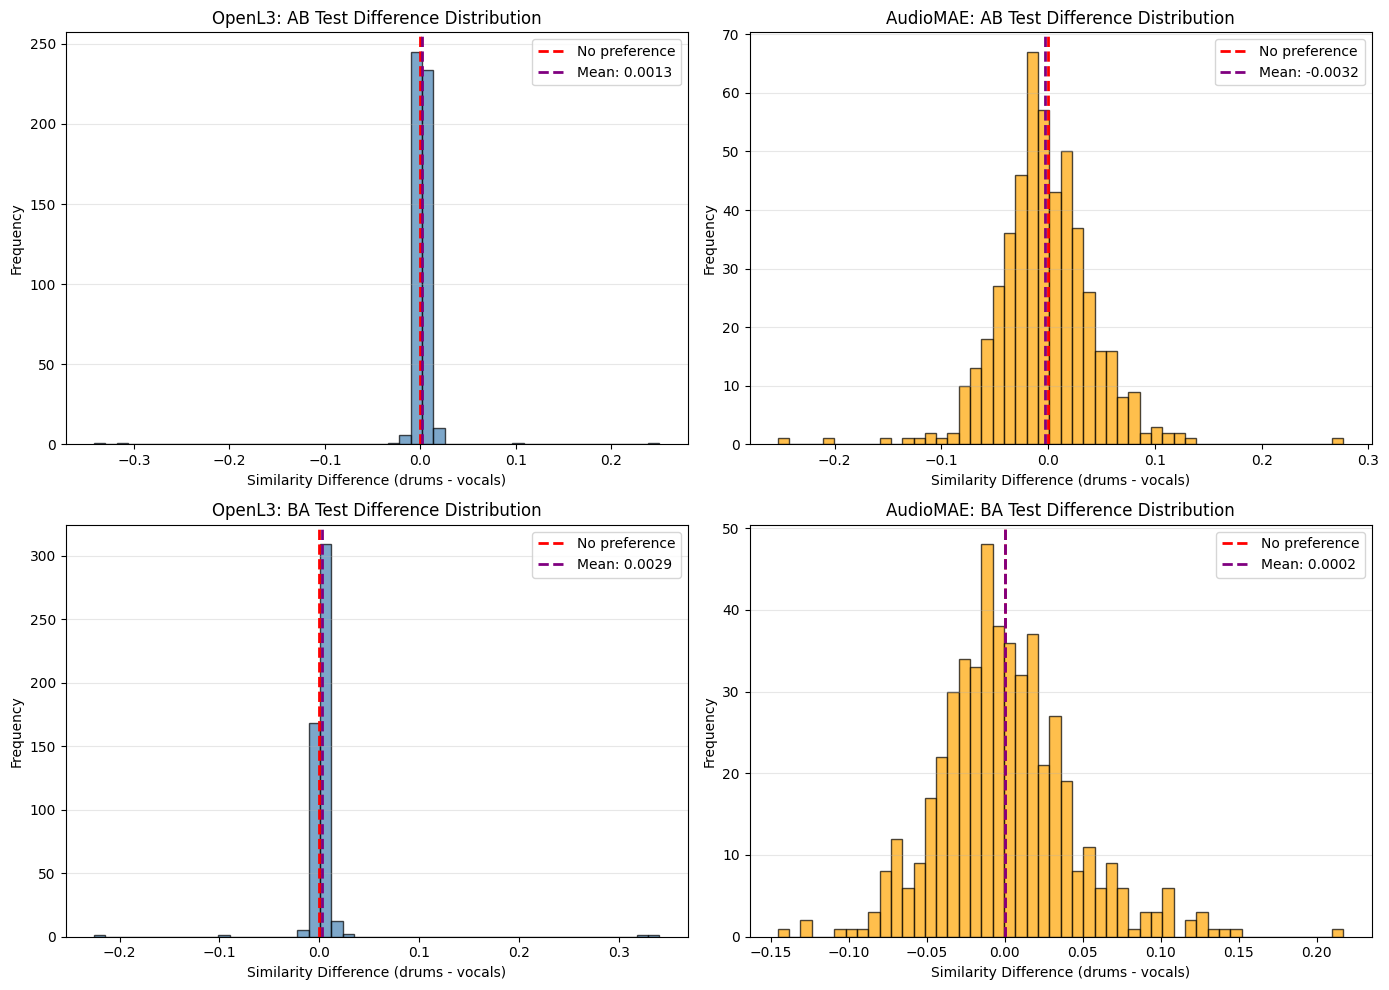

In [8]:
# Similarity difference histograms
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# OpenL3 AB test
ax = axes[0, 0]
openl3_results['ab_diff'] = openl3_results['sim_ab_aa'] - openl3_results['sim_ab_bb']
ax.hist(openl3_results['ab_diff'], bins=50, alpha=0.7, color='steelblue', edgecolor='black')
ax.axvline(x=0, color='red', linestyle='--', linewidth=2, label='No preference')
ax.axvline(x=openl3_results['ab_diff'].mean(), color='purple', linestyle='--', linewidth=2, 
           label=f'Mean: {openl3_results["ab_diff"].mean():.4f}')
ax.set_xlabel('Similarity Difference (drums - vocals)')
ax.set_ylabel('Frequency')
ax.set_title('OpenL3: AB Test Difference Distribution')
ax.legend()
ax.grid(axis='y', alpha=0.3)

# AudioMAE AB test
ax = axes[0, 1]
audiomae_results['ab_diff'] = audiomae_results['sim_ab_aa'] - audiomae_results['sim_ab_bb']
ax.hist(audiomae_results['ab_diff'], bins=50, alpha=0.7, color='orange', edgecolor='black')
ax.axvline(x=0, color='red', linestyle='--', linewidth=2, label='No preference')
ax.axvline(x=audiomae_results['ab_diff'].mean(), color='purple', linestyle='--', linewidth=2, 
           label=f'Mean: {audiomae_results["ab_diff"].mean():.4f}')
ax.set_xlabel('Similarity Difference (drums - vocals)')
ax.set_ylabel('Frequency')
ax.set_title('AudioMAE: AB Test Difference Distribution')
ax.legend()
ax.grid(axis='y', alpha=0.3)

# OpenL3 BA test
ax = axes[1, 0]
openl3_results['ba_diff'] = openl3_results['sim_ba_bb'] - openl3_results['sim_ba_aa']
ax.hist(openl3_results['ba_diff'], bins=50, alpha=0.7, color='steelblue', edgecolor='black')
ax.axvline(x=0, color='red', linestyle='--', linewidth=2, label='No preference')
ax.axvline(x=openl3_results['ba_diff'].mean(), color='purple', linestyle='--', linewidth=2, 
           label=f'Mean: {openl3_results["ba_diff"].mean():.4f}')
ax.set_xlabel('Similarity Difference (drums - vocals)')
ax.set_ylabel('Frequency')
ax.set_title('OpenL3: BA Test Difference Distribution')
ax.legend()
ax.grid(axis='y', alpha=0.3)

# AudioMAE BA test
ax = axes[1, 1]
audiomae_results['ba_diff'] = audiomae_results['sim_ba_bb'] - audiomae_results['sim_ba_aa']
ax.hist(audiomae_results['ba_diff'], bins=50, alpha=0.7, color='orange', edgecolor='black')
ax.axvline(x=0, color='red', linestyle='--', linewidth=2, label='No preference')
ax.axvline(x=audiomae_results['ba_diff'].mean(), color='purple', linestyle='--', linewidth=2, 
           label=f'Mean: {audiomae_results["ba_diff"].mean():.4f}')
ax.set_xlabel('Similarity Difference (drums - vocals)')
ax.set_ylabel('Frequency')
ax.set_title('AudioMAE: BA Test Difference Distribution')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [10]:
from scipy import stats

print("=== Statistical Significance Tests ===")
print()

# OpenL3
openl3_combined = openl3_results[['ab_diff', 'ba_diff']].values.flatten()
t_stat_openl3, p_value_openl3 = stats.ttest_1samp(openl3_combined, 0)
print(f"OpenL3:")
print(f"  Mean difference: {openl3_combined.mean():.4f}")
print(f"  t-statistic: {t_stat_openl3:.4f}")
print(f"  p-value: {p_value_openl3:.4e}")
print(f"  Statistically significant: {'YES' if p_value_openl3 < 0.05 else 'NO'}")
print(f"  Practically meaningful: {'YES' if abs(openl3_combined.mean()) > 0.01 else 'NO (< 1%)'}")
print()

# AudioMAE
audiomae_combined = audiomae_results[['ab_diff', 'ba_diff']].values.flatten()
t_stat_audiomae, p_value_audiomae = stats.ttest_1samp(audiomae_combined, 0)
print(f"AudioMAE:")
print(f"  Mean difference: {audiomae_combined.mean():.4f}")
print(f"  t-statistic: {t_stat_audiomae:.4f}")
print(f"  p-value: {p_value_audiomae:.4e}")
print(f"  Statistically significant: {'YES' if p_value_audiomae < 0.05 else 'NO'}")
print(f"  Practically meaningful: {'YES' if abs(audiomae_combined.mean()) > 0.01 else 'NO (< 1%)'}")

=== Statistical Significance Tests ===

OpenL3:
  Mean difference: 0.0021
  t-statistic: 2.7207
  p-value: 6.6282e-03
  Statistically significant: YES
  Practically meaningful: NO (< 1%)

AudioMAE:
  Mean difference: -0.0015
  t-statistic: -1.0938
  p-value: 2.7432e-01
  Statistically significant: NO
  Practically meaningful: NO (< 1%)
